In [ ]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.

## Tiền xử lý

### Overview

In [ ]:
import pandas as pd

df= pd.read_csv('/content/data.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Xóa cột miss ID

In [ ]:
missing_customer = df[df['CustomerID'].isnull()]
missing_customer.info()


<class 'pandas.core.frame.DataFrame'>
Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    135080 non-null  object        
 1   StockCode    135080 non-null  object        
 2   Description  133626 non-null  object        
 3   Quantity     135080 non-null  int64         
 4   InvoiceDate  135080 non-null  datetime64[ns]
 5   UnitPrice    135080 non-null  float64       
 6   CustomerID   0 non-null       object        
 7   Country      135080 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 9.3+ MB


In [ ]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


### Quantity < 0 và Unitprice = 0

In [ ]:
# Kiểm tra số lượng âm (thường là hàng bị trả lại)
print("Số dòng có Quantity âm:", (df['Quantity'] < 0).sum())

# Kiểm tra giá sản phẩm âm hoặc bằng 0 (không hợp lệ)
print("Số dòng có UnitPrice <= 0:", (df['UnitPrice'] <= 0).sum())


Số dòng có Quantity âm: 8905
Số dòng có UnitPrice <= 0: 40


In [ ]:
under_quan = df[df['Quantity'] < 0]
under_quan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [ ]:
# Loại bỏ các dòng có Quantity <= 0 hoặc UnitPrice <= 0
df = df[(df['Quantity'] > 0)]


In [ ]:
under_unit = df[df['UnitPrice'] <= 0]
under_unit.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [ ]:
mean_price_per_product = df[df['UnitPrice'] > 0].groupby('StockCode')['UnitPrice'].mean()

# Tạo mask các dòng có giá = 0
mask_zero_price = df['UnitPrice'] == 0

# Với mỗi dòng có giá = 0, thay bằng giá trung bình tương ứng theo StockCode
df.loc[mask_zero_price, 'UnitPrice'] = df.loc[mask_zero_price, 'StockCode'].map(mean_price_per_product)


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


### Kiểm tra các stockcode bất thường

In [ ]:
invalid_stockcode = df[~df['StockCode'].str.match('^[0-9]', na=False)]
print(invalid_stockcode)


       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
45        536370      POST     POSTAGE         3 2010-12-01 08:45:00   
386       536403      POST     POSTAGE         1 2010-12-01 11:27:00   
1123      536527      POST     POSTAGE         1 2010-12-01 13:04:00   
1423      536540        C2    CARRIAGE         1 2010-12-01 14:05:00   
2239      536569         M      Manual         1 2010-12-01 15:35:00   
...          ...       ...         ...       ...                 ...   
541198    581493      POST     POSTAGE         1 2011-12-09 10:10:00   
541216    581494      POST     POSTAGE         2 2011-12-09 10:13:00   
541730    581570      POST     POSTAGE         1 2011-12-09 11:59:00   
541767    581574      POST     POSTAGE         2 2011-12-09 12:09:00   
541768    581578      POST     POSTAGE         3 2011-12-09 12:16:00   

        UnitPrice CustomerID         Country  
45          18.00      12583          France  
386         15.00      12791     Netherla

In [ ]:
# Giữ lại chỉ các dòng có StockCode là số hoặc bắt đầu bằng số (sản phẩm thật)
df = df[df['StockCode'].str.match('^[0-9]+', na=False)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396370 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396370 non-null  object        
 1   StockCode    396370 non-null  object        
 2   Description  396370 non-null  object        
 3   Quantity     396370 non-null  int64         
 4   InvoiceDate  396370 non-null  datetime64[ns]
 5   UnitPrice    396370 non-null  float64       
 6   CustomerID   396370 non-null  object        
 7   Country      396370 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [ ]:
df.head(400000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### EDA

/tmp/ipython-input-21-3908668467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


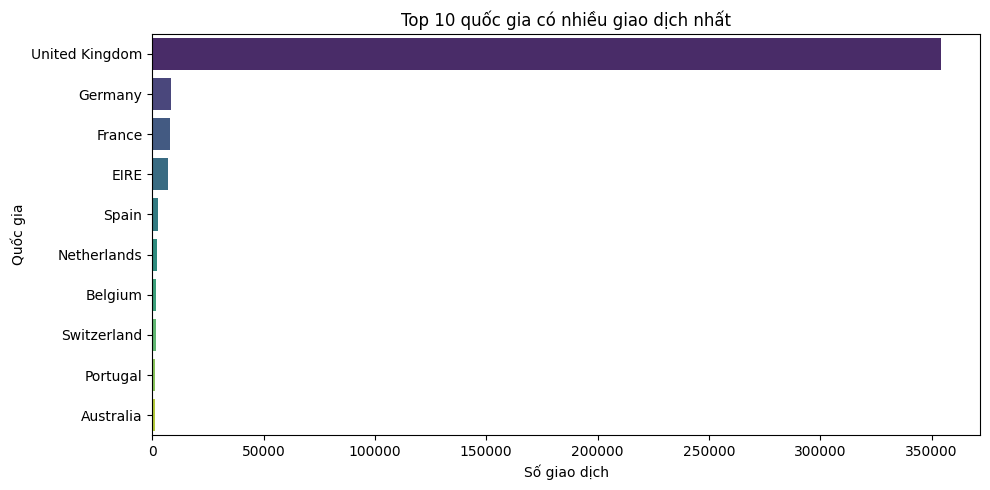

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 quốc gia có nhiều giao dịch nhất")
plt.xlabel("Số giao dịch")
plt.ylabel("Quốc gia")
plt.tight_layout()
plt.show()


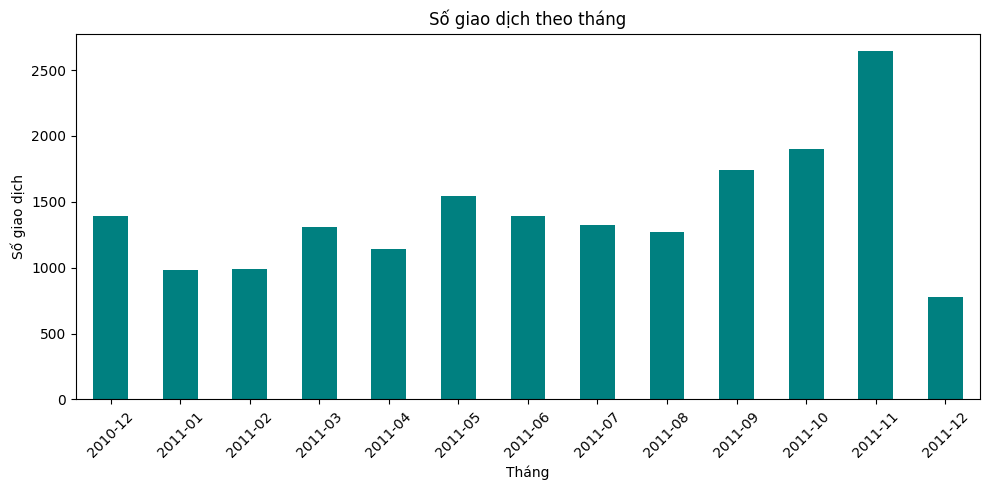

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_tx = df.groupby('Month')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 5))
monthly_tx.plot(kind='bar', color='teal')
plt.title('Số giao dịch theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


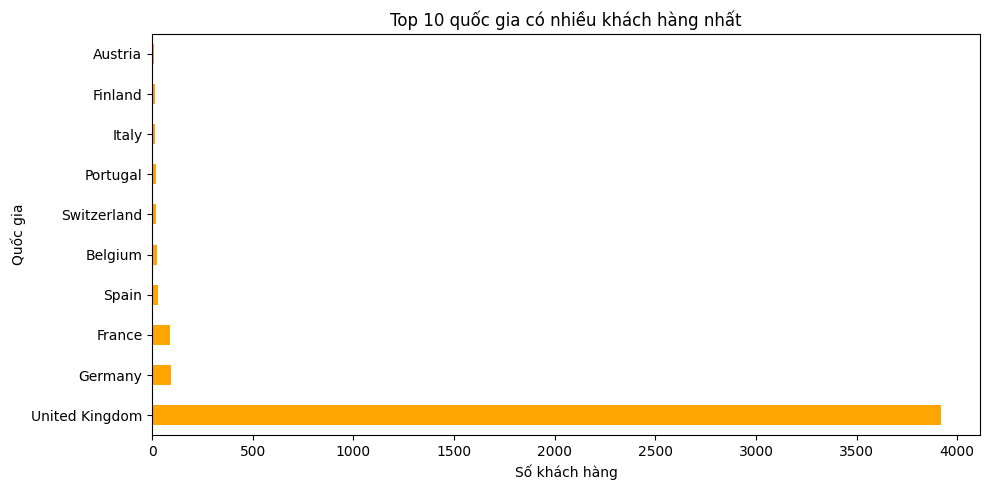

In [ ]:
customer_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
customer_country.plot(kind='barh', color='orange')
plt.title('Top 10 quốc gia có nhiều khách hàng nhất')
plt.xlabel('Số khách hàng')
plt.ylabel('Quốc gia')
plt.tight_layout()
plt.show()


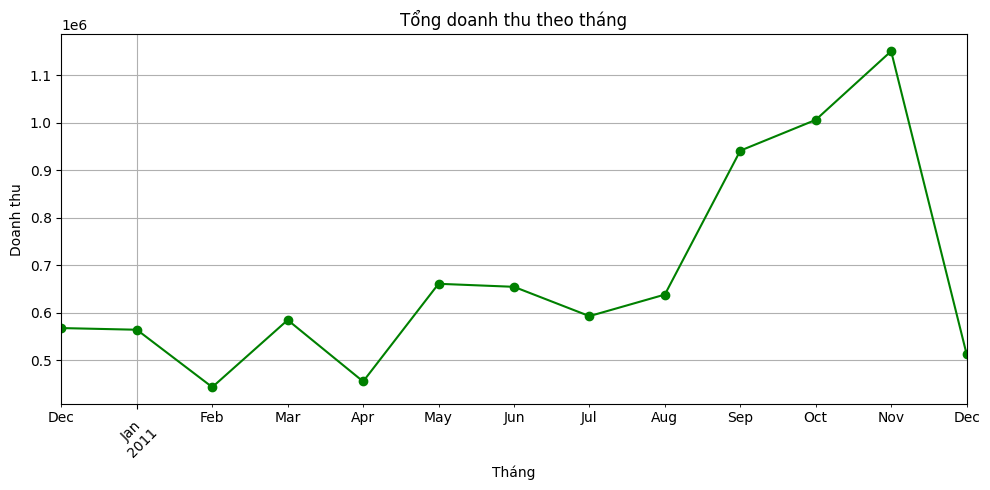

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
revenue_monthly = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
revenue_monthly.plot(kind='line', marker='o', color='green')
plt.title('Tổng doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-25-3236711016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='mako')


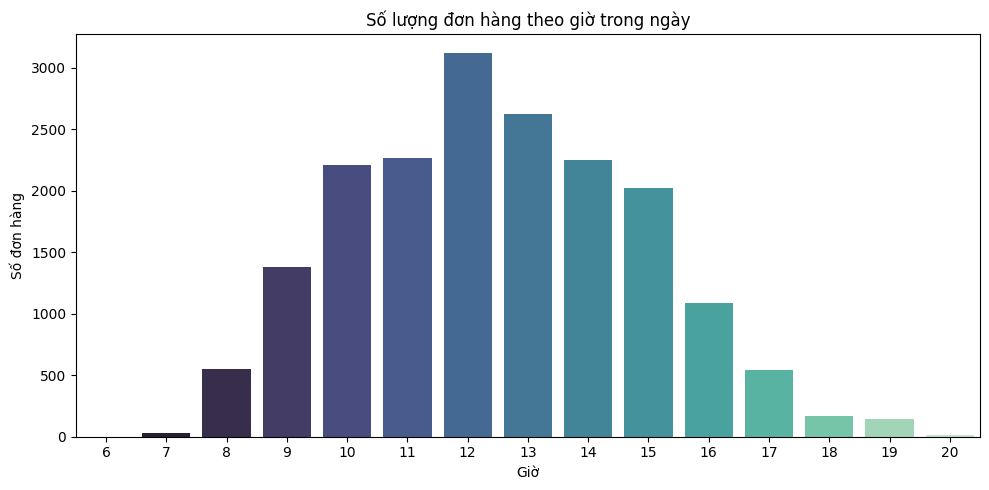

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_orders = df.groupby('Hour')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='mako')
plt.title('Số lượng đơn hàng theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số đơn hàng')
plt.tight_layout()
plt.show()


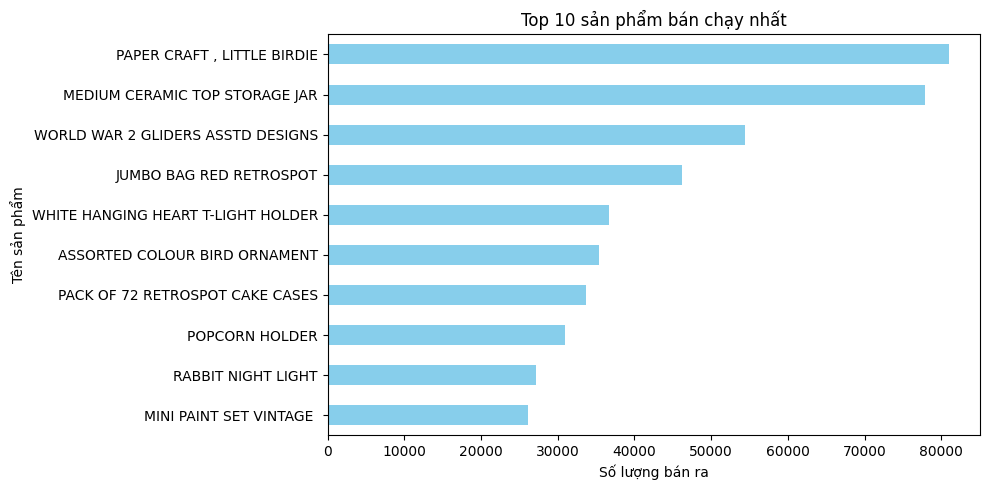

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 sản phẩm bán chạy nhất')
plt.xlabel('Số lượng bán ra')
plt.ylabel('Tên sản phẩm')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


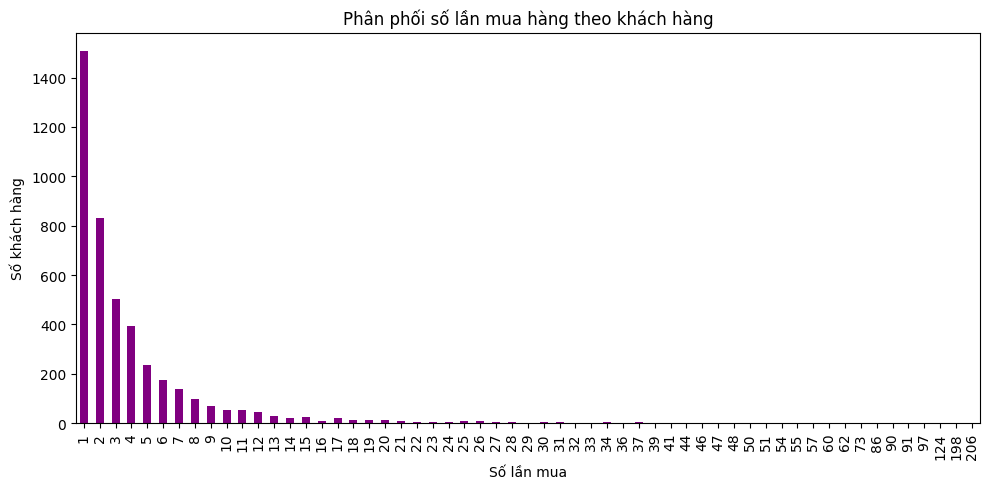

In [ ]:
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = repeat_customers.value_counts().sort_index()

plt.figure(figsize=(10, 5))
repeat_customers.plot(kind='bar', color='purple')
plt.title('Phân phối số lần mua hàng theo khách hàng')
plt.xlabel('Số lần mua')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()


## RFM

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Ngày phân tích: {snapshot_date}")

Ngày phân tích: 2011-12-10 12:50:00


In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',   # số lần mua hàng (đơn hàng)
    'TotalPrice': 'sum'       # tổng tiền đã chi
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1437.24
12349            19          1   1457.55
12350           310          1    294.40


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4335 non-null   int64  
 1   Frequency  4335 non-null   int64  
 2   Monetary   4335 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.5+ KB


In [ ]:
rfm = pd.DataFrame(rfm, columns=['Recency', 'Frequency', 'Monetary'])
rfm.to_csv("rfm.csv", index=False)

print("✅ Đã xuất file rfm.csv thành công.")

✅ Đã xuất file rfm.csv thành công.


# Xử lý outlier

In [ ]:
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())


           Recency    Frequency       Monetary
count  4335.000000  4335.000000    4335.000000
mean     92.684890     4.245675    2023.325755
std     100.172622     7.636337    8917.833040
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     305.580000
50%      51.000000     2.000000     668.140000
75%     143.000000     5.000000    1632.775000
max     374.000000   206.000000  279923.335978


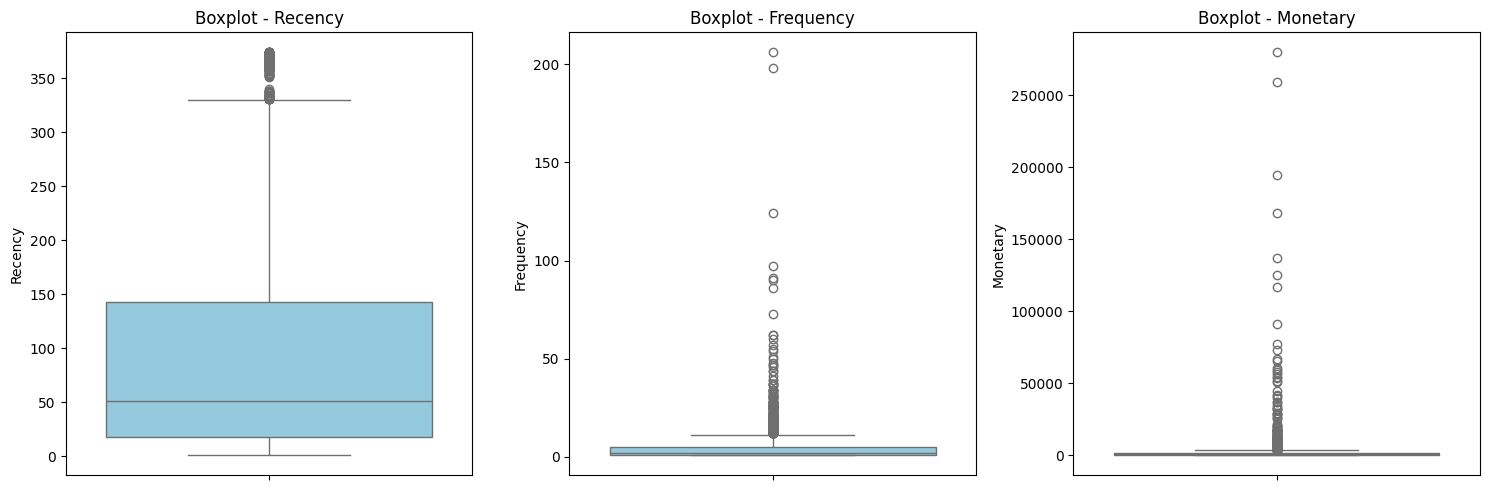

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


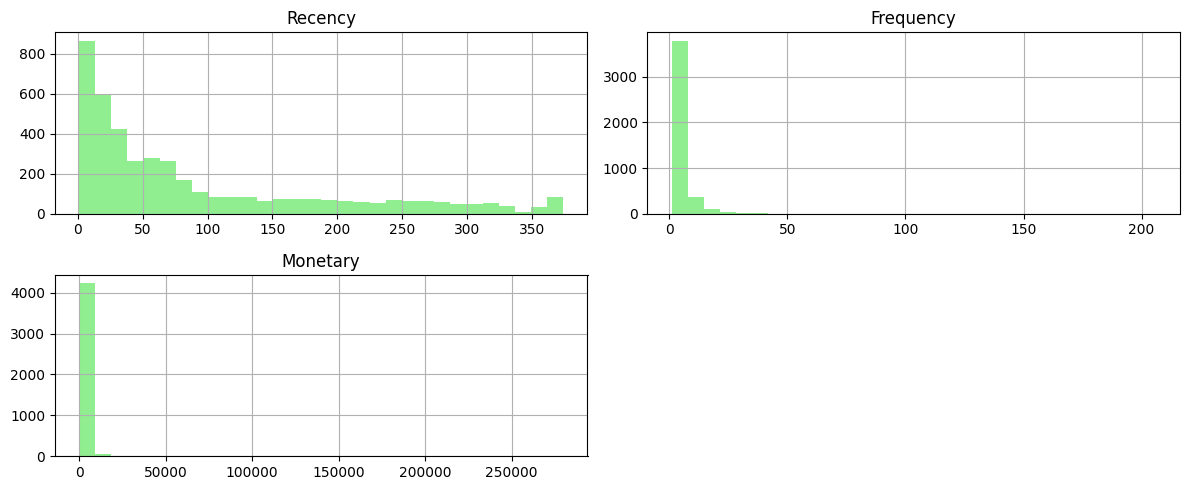

In [ ]:
rfm[['Recency', 'Frequency', 'Monetary']].hist(bins=30, figsize=(12, 5), color='lightgreen')
plt.tight_layout()
plt.show()


✅ Phân tích trực quan outlier qua boxplot:

🔹 Recency:
Outlier không nhiều, chỉ vài điểm > 340 ngày.

Không cần loại nếu bạn vẫn muốn giữ khách lâu không quay lại.

🔸 Frequency:

Cực nhiều outlier! Nhìn thấy rõ là:

Phần lớn khách mua 1–5 lần.

Nhưng có nhiều khách mua 20–200 lần → cần kiểm tra lại.


🔴 Monetary:

Đây là vấn đề lớn nhất:

Các điểm tiêu trên 50,000–280,000 hoàn toàn khác biệt.

Những điểm này chắc chắn ảnh hưởng kết quả scale & phân cụm nếu giữ lại.



In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


In [ ]:
# Bắt đầu với bản sao rfm gốc
rfm_filtered = rfm.copy()

# Loại outlier Monetary
rfm_filtered = remove_outliers_iqr(rfm_filtered, 'Monetary')

# Tiếp theo loại outlier Frequency
rfm_filtered = remove_outliers_iqr(rfm_filtered, 'Frequency')

# In kết quả sau lọc
print(f"Số dòng sau khi lọc outlier: {rfm_filtered.shape[0]}")


Số dòng sau khi lọc outlier: 3748


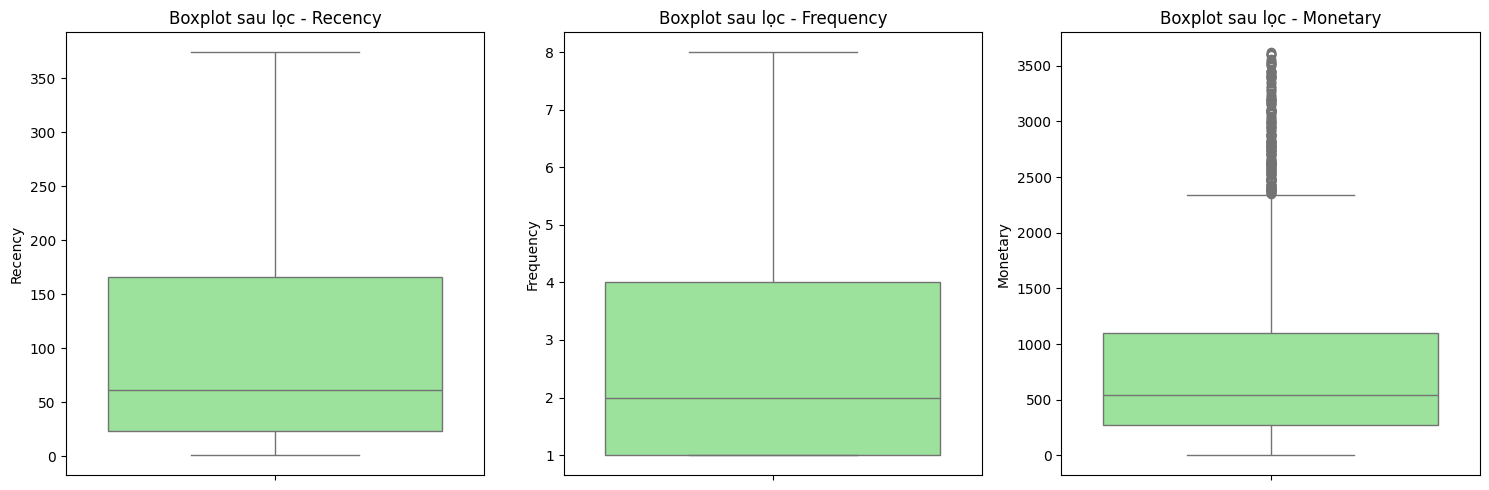

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm_filtered[col], color='lightgreen')
    plt.title(f'Boxplot sau lọc - {col}')
plt.tight_layout()
plt.show()


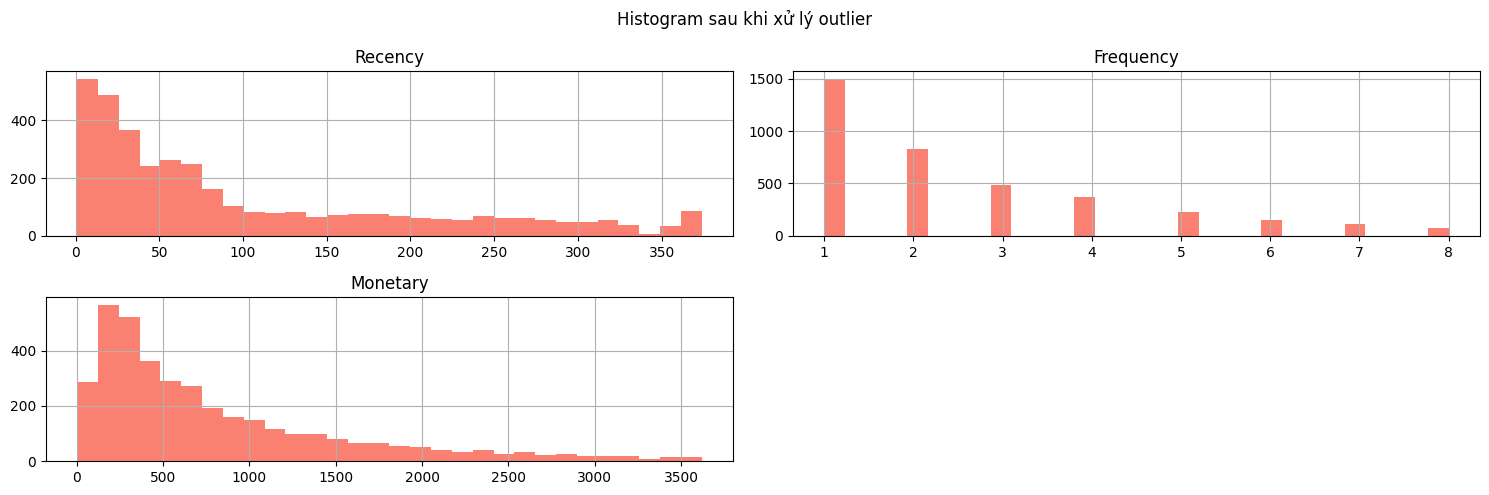

In [ ]:
rfm_filtered[['Recency', 'Frequency', 'Monetary']].hist(bins=30, figsize=(15, 5), color='salmon')
plt.suptitle("Histogram sau khi xử lý outlier")
plt.tight_layout()
plt.show()


In [ ]:
print(rfm_filtered[['Recency', 'Frequency', 'Monetary']].describe())


           Recency    Frequency     Monetary
count  3748.000000  3748.000000  3748.000000
mean    103.195571     2.540288   806.507493
std     102.395375     1.809069   748.797452
min       1.000000     1.000000     3.750000
25%      23.000000     1.000000   269.745000
50%      61.000000     2.000000   541.495000
75%     166.000000     4.000000  1100.210000
max     374.000000     8.000000  3619.170000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered[['Recency', 'Frequency', 'Monetary']])


In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.2 MB/s eta 0:00:00


# KMediods thư viện

In [ ]:
from sklearn_extra.cluster import KMedoids


# Phân cụm
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(rfm_scaled)

# Gán nhãn vào DataFrame gốc
rfm_filtered['Cluster'] = kmedoids.labels_

# Kiểm tra số lượng khách theo cụm
print(rfm_filtered['Cluster'].value_counts())


Cluster
0    1436
1    1345
2     967
Name: count, dtype: int64


In [ ]:
rfm_filtered.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,55.609331,1.525070,415.901967
1,43.949442,4.460967,1531.108818
2,256.266805,1.376422,378.710961


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(rfm_scaled, kmedoids.labels_)

print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.4108


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(rfm_scaled, kmedoids.labels_)
print(f"Davies-Bouldin Score: {db_score:.4f}")


Davies-Bouldin Score: 0.7965


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(rfm_scaled, kmedoids.labels_)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")


Calinski-Harabasz Score: 3409.2664


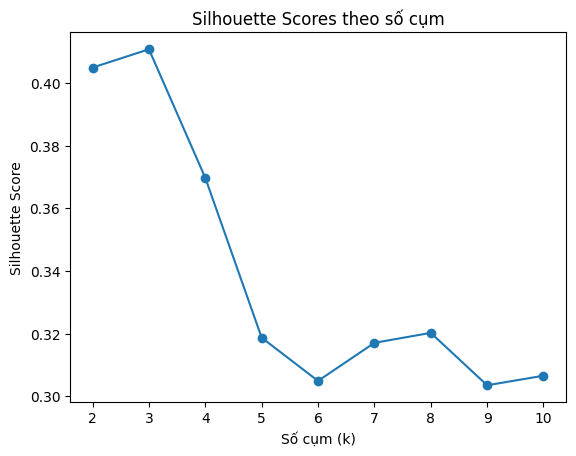

In [ ]:
scores = []
for k in range(2, 11):
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, model.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores, marker='o')
plt.title("Silhouette Scores theo số cụm")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.show()


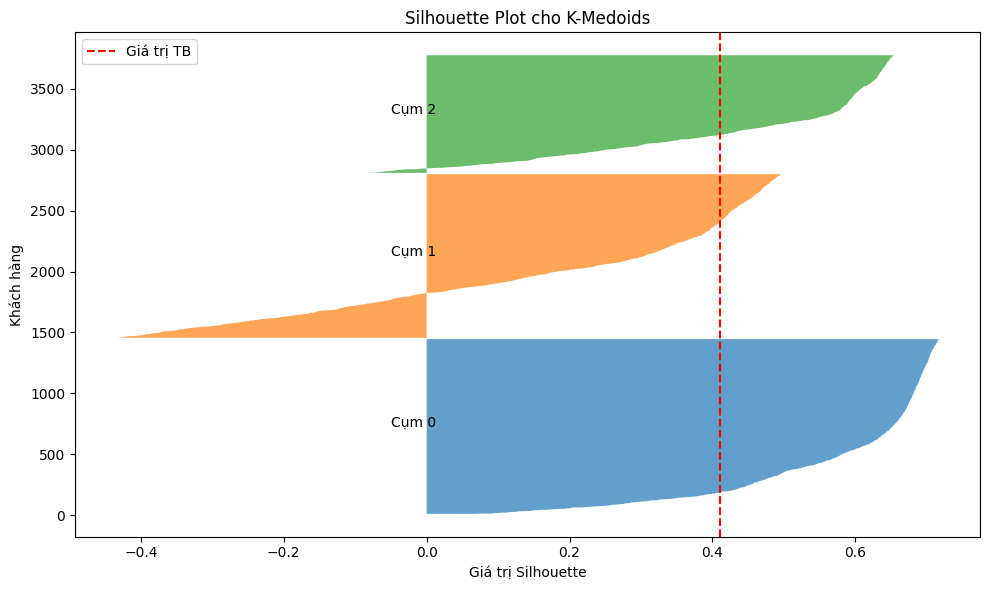

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

labels = rfm_filtered['Cluster'].values  # lấy nhãn cụm
sil_vals = silhouette_samples(rfm_scaled, labels)

rfm_filtered['Silhouette'] = sil_vals
rfm_sorted = rfm_filtered.sort_values(by="Cluster")

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):  # số cụm
    ith_cluster_sil_vals = sil_vals[labels == i]
    ith_cluster_sil_vals.sort()
    size_cluster_i = ith_cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cụm {i}")
    y_lower = y_upper + 10

plt.axvline(np.mean(sil_vals), color="red", linestyle="--", label='Giá trị TB')
plt.title("Silhouette Plot cho K-Medoids")
plt.xlabel("Giá trị Silhouette")
plt.ylabel("Khách hàng")
plt.legend()
plt.tight_layout()
plt.show()


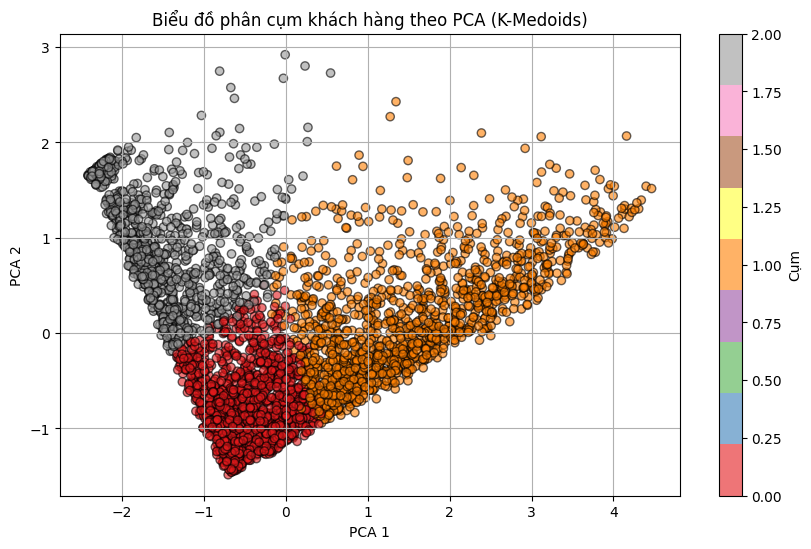

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# Gắn lại vào rfm_filtered
rfm_filtered['PCA1'] = pca_components[:, 0]
rfm_filtered['PCA2'] = pca_components[:, 1]

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    rfm_filtered['PCA1'], rfm_filtered['PCA2'],
    c=rfm_filtered['Cluster'], cmap='Set1', alpha=0.6, edgecolors='k'
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Biểu đồ phân cụm khách hàng theo PCA (K-Medoids)')
plt.colorbar(scatter, label='Cụm')
plt.grid(True)
plt.show()


# Kmediods cài tay

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import random

def k_medoids(X, k, max_iter=100, random_state=42):
    np.random.seed(random_state)
    random.seed(random_state)

    m, n = X.shape
    medoid_indices = random.sample(range(m), k)
    medoids = X[medoid_indices]

    for _ in range(max_iter):
        # Bước 2: Gán nhãn cụm
        distances = pairwise_distances(X, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_indices = np.where(labels == i)[0]
            cluster_points = X[cluster_indices]

            if len(cluster_points) == 0:
                # cụm rỗng → giữ nguyên
                new_medoids.append(medoids[i])
                continue

            intra_distances = pairwise_distances(cluster_points, cluster_points)
            total_distances = np.sum(intra_distances, axis=1)
            best_index = np.argmin(total_distances)
            new_medoids.append(X[cluster_indices[best_index]])

        new_medoids = np.array(new_medoids)

        if np.allclose(medoids, new_medoids):
            break
        else:
            medoids = new_medoids

    final_distances = pairwise_distances(X, medoids)
    final_labels = np.argmin(final_distances, axis=1)

    return np.array(medoids), np.array(final_labels)


In [ ]:
# Giả sử bạn đã có rfm_scaled (dữ liệu đã loại outlier & chuẩn hóa)
medoids, labels = k_medoids(rfm_scaled, k=3)

# Gắn lại nhãn vào DataFrame
rfm_filtered['Cluster_manual'] = labels


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_score = silhouette_score(rfm_scaled, labels)
db_score = davies_bouldin_score(rfm_scaled, labels)
ch_score = calinski_harabasz_score(rfm_scaled, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")


Silhouette Score: 0.4475
Davies-Bouldin Score: 0.7868
Calinski-Harabasz Score: 3973.9123


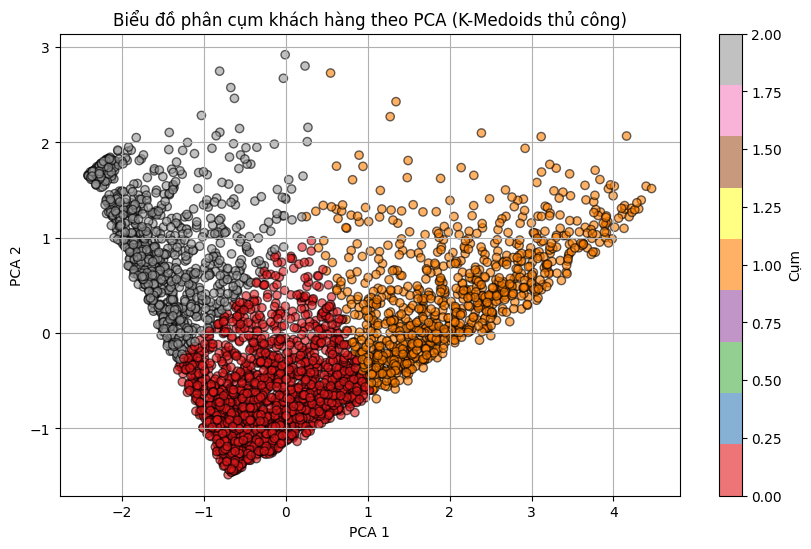

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm chiều còn 2D để vẽ
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# Thêm vào DataFrame
rfm_filtered['PCA1'] = pca_components[:, 0]
rfm_filtered['PCA2'] = pca_components[:, 1]

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rfm_filtered['PCA1'], rfm_filtered['PCA2'],
                      c=rfm_filtered['Cluster_manual'], cmap='Set1', alpha=0.6, edgecolors='k')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Biểu đồ phân cụm khách hàng theo PCA (K-Medoids thủ công)')
plt.colorbar(scatter, label='Cụm')
plt.grid(True)
plt.show()


# Thuật toán khác

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)

# Đánh giá
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("🎯 K-Means:")
print(f"Silhouette Score: {silhouette_score(rfm_scaled, kmeans_labels):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(rfm_scaled, kmeans_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(rfm_scaled, kmeans_labels):.4f}")


🎯 K-Means:
Silhouette Score: 0.4501
Davies-Bouldin Score: 0.7814
Calinski-Harabasz Score: 3997.3267


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)  # có thể cần tinh chỉnh
dbscan_labels = dbscan.fit_predict(rfm_scaled)

# Lọc bỏ nhãn -1 (outlier) trước khi đánh giá
mask = dbscan_labels != -1
print("🎯 DBSCAN:")
if len(set(dbscan_labels[mask])) > 1:
    print(f"Silhouette Score: {silhouette_score(rfm_scaled[mask], dbscan_labels[mask]):.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin_score(rfm_scaled[mask], dbscan_labels[mask]):.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(rfm_scaled[mask], dbscan_labels[mask]):.4f}")
else:
    print("DBSCAN chỉ tạo ra 1 cụm (hoặc toàn outlier).")


🎯 DBSCAN:
DBSCAN chỉ tạo ra 1 cụm (hoặc toàn outlier).


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(rfm_scaled)

print("🎯 GMM:")
print(f"Silhouette Score: {silhouette_score(rfm_scaled, gmm_labels):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(rfm_scaled, gmm_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(rfm_scaled, gmm_labels):.4f}")


🎯 GMM:
Silhouette Score: 0.1836
Davies-Bouldin Score: 1.5509
Calinski-Harabasz Score: 1264.4848


✅ Kết luận:

🏆 KMeans là tốt nhất về cả 3 chỉ số → cụm tách biệt rõ và đồng đều.

🥈 K-Medoids thủ công rất gần với KMeans, có ưu điểm chống nhiễu tốt hơn (do dùng medoid).

❌ GMM cho kết quả yếu: cụm không tách biệt tốt.

⚠️ DBSCAN không phù hợp trong bài toán này với tham số hiện tại (eps nhỏ quá hoặc dữ liệu không có cụm dày đặc).



# Streamlit

2025-05-21 09:33:35.418 No runtime found, using MemoryCacheStorageManager
2025-05-21 09:33:35.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 09:33:35.431 Thread 'MainThread':

DeltaGenerator()

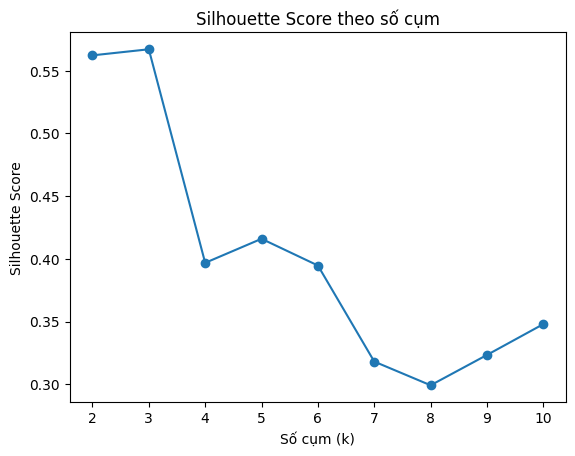

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import random

# Tải dữ liệu hoặc giả định dữ liệu RFM
@st.cache_data
def load_data():
    return  pd.read_csv("/content/rfm.csv")

# K-medoids thủ công
def k_medoids(X, k, max_iter=100):
    m, n = X.shape
    medoid_indices = random.sample(range(m), k)
    medoids = X[medoid_indices]

    for _ in range(max_iter):
        distances = pairwise_distances(X, medoids)
        labels = np.argmin(distances, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                new_medoids.append(medoids[i])
                continue
            intra_distances = pairwise_distances(cluster_points, cluster_points)
            total_distances = np.sum(intra_distances, axis=1)
            best_index = np.argmin(total_distances)
            new_medoids.append(cluster_points[best_index])

        new_medoids = np.array(new_medoids)
        if np.all(medoids == new_medoids):
            break
        else:
            medoids = new_medoids

    final_distances = pairwise_distances(X, medoids)
    final_labels = np.argmin(final_distances, axis=1)
    return medoids, final_labels

# ------------------------
# Giao diện Streamlit
# ------------------------

st.set_page_config(page_title="Phân Cụm Khách Hàng với K-Medoids", layout="wide")
st.title("📊 Phân cụm khách hàng bằng K-Medoids")

rfm = load_data()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Chọn số cụm
k = st.slider("Chọn số cụm (k):", 2, 10, 3)

# Phân cụm
medoids, labels = k_medoids(rfm_scaled, k)
rfm['Cluster'] = labels

# Hiển thị bảng tổng hợp theo cụm
st.subheader("📈 Trung bình RFM theo cụm")
st.dataframe(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2))

# Thống kê số lượng
st.subheader("👥 Số lượng khách hàng theo cụm")
st.bar_chart(rfm['Cluster'].value_counts().sort_index())

# Đánh giá chất lượng phân cụm
sil_score = silhouette_score(rfm_scaled, labels)
db_score = davies_bouldin_score(rfm_scaled, labels)
ch_score = calinski_harabasz_score(rfm_scaled, labels)

st.subheader("📊 Đánh giá chất lượng cụm")
st.markdown(f"- **Silhouette Score**: `{sil_score:.4f}`")
st.markdown(f"- **Davies-Bouldin Score**: `{db_score:.4f}`")
st.markdown(f"- **Calinski-Harabasz Score**: `{ch_score:.4f}`")

# Biểu đồ Silhouette theo nhiều giá trị k
scores = []
k_values = list(range(2, 11))
for i in k_values:
    model = KMedoids(n_clusters=i, random_state=42)
    model.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, model.labels_)
    scores.append(score)

st.subheader("📉 Biểu đồ Silhouette theo số cụm")
fig, ax = plt.subplots()
ax.plot(k_values, scores, marker='o')
ax.set_xlabel("Số cụm (k)")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Score theo số cụm")
st.pyplot(fig)


In [ ]:
!pip install streamlit pyngrok
!ngrok config add-authtoken 2mB591MfsuJshzUIhTHzuZUv0Gn_5VEn6NQ2C8cd9qAS3GZwL
!pkill ngrok
!pip install streamlit
!pip install -q streamlit pyngrok
!pip install bcrypt
!pip install pyngrok
!pip install --upgrade pyngrok


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Tạo đường hầm cho cổng 8501
public_url = ngrok.connect(8502, "http")
print(f"Access your Streamlit app at: {public_url}")

# Khởi động ứng dụng Streamlit
!streamlit run app.py &>/dev/null&

Access your Streamlit app at: NgrokTunnel: "https://50af-34-138-43-20.ngrok-free.app" -> "http://localhost:8502"
